## Importing libraries


In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Added for Random Forest
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/2025-09-01T04-03-42.625Z-2025-07-04T13-24-57.561Z-diabetes.csv')

## EDA

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Data Exploration
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85            

In [19]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1
767,1,93,70,31,30.5,30.4,0.315,23,0


In [21]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Check for missing values

In [22]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## # Replace 0 values with median for specific columns (as 0 is not realistic for these features)

In [28]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_replace:
    data[column] = data[column].replace(0, data[column].median())

## Features and target

In [23]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

## Split the data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize classifiers

In [30]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [31]:
# Dictionary to store results
results = {}

## Train and evaluate each classifier

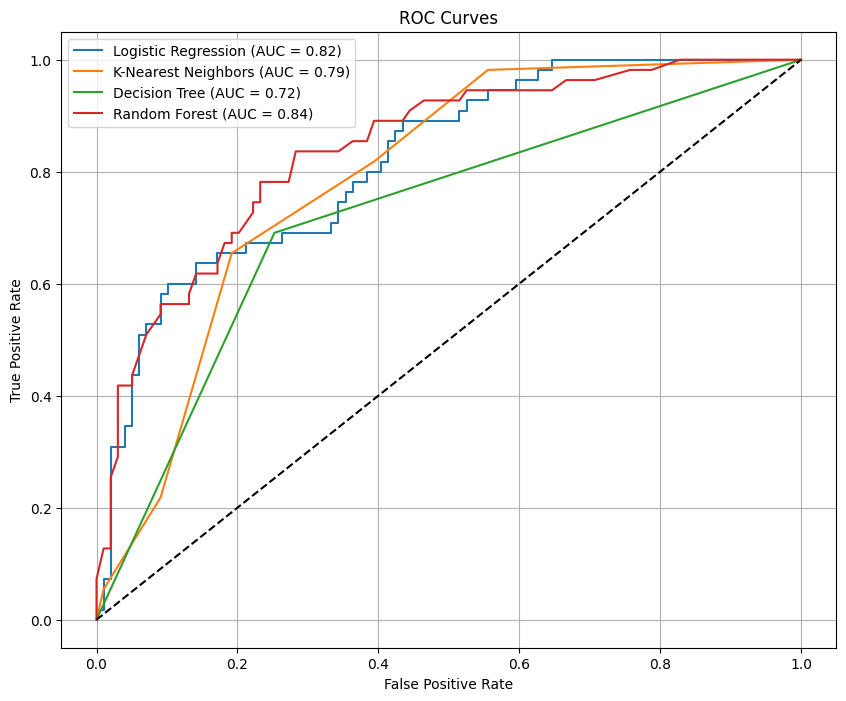

In [32]:
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_scaled)

    # Store metrics
    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

    # Calculate ROC curve and AUC
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        results[name]['auc'] = auc_score
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


## Print evaluation metrics

In [34]:
for name, metrics in results.items():
    print(f"\nResults for {name}:")
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\nClassification Report:")
    report = metrics['classification_report']
    print(f"Precision: {report['weighted avg']['precision']:.2f}")
    print(f"Recall: {report['weighted avg']['recall']:.2f}")
    print(f"F1-score: {report['weighted avg']['f1-score']:.2f}")
    if 'auc' in metrics:
        print(f"AUC Score: {metrics['auc']:.2f}")


Results for Logistic Regression:

Confusion Matrix:
[[82 17]
 [19 36]]

Classification Report:
Precision: 0.76
Recall: 0.77
F1-score: 0.77
AUC Score: 0.82

Results for K-Nearest Neighbors:

Confusion Matrix:
[[80 19]
 [19 36]]

Classification Report:
Precision: 0.75
Recall: 0.75
F1-score: 0.75
AUC Score: 0.79

Results for Decision Tree:

Confusion Matrix:
[[74 25]
 [17 38]]

Classification Report:
Precision: 0.74
Recall: 0.73
F1-score: 0.73
AUC Score: 0.72

Results for Random Forest:

Confusion Matrix:
[[80 19]
 [17 38]]

Classification Report:
Precision: 0.77
Recall: 0.77
F1-score: 0.77
AUC Score: 0.84


## Visualize Confusion Matrices

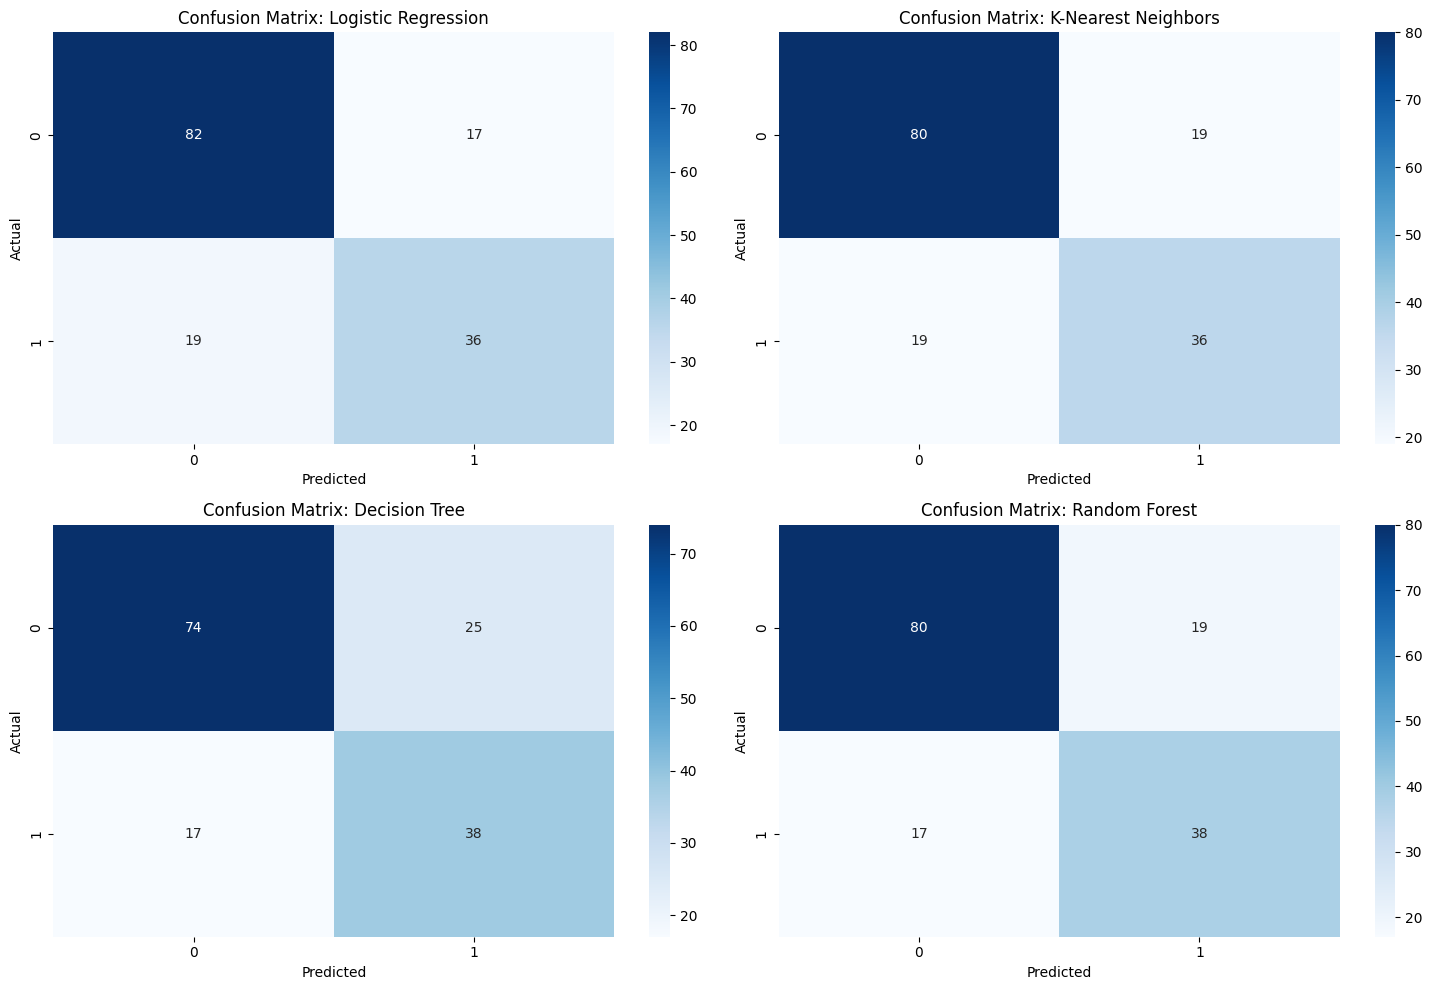

In [36]:
plt.figure(figsize=(15, 10))
for i, (name, metrics) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

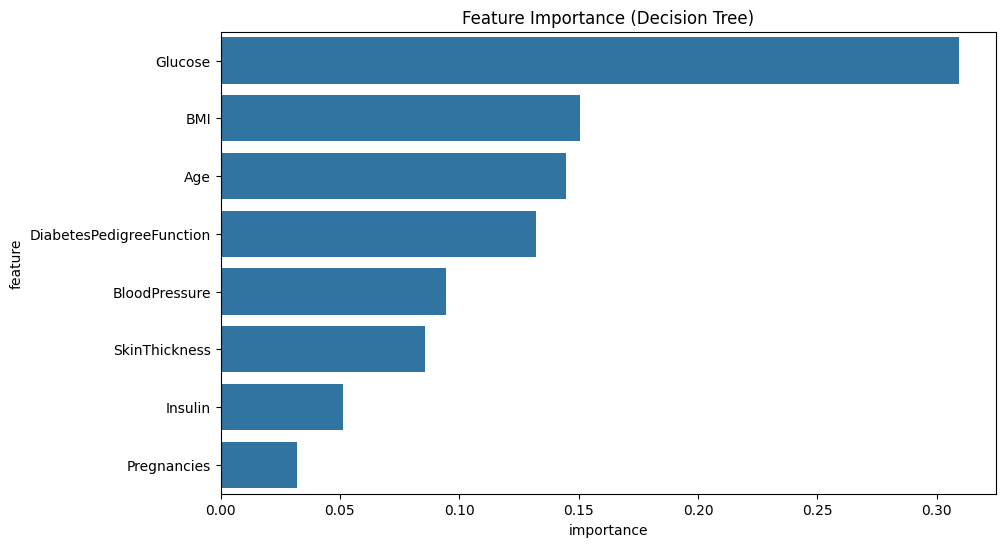

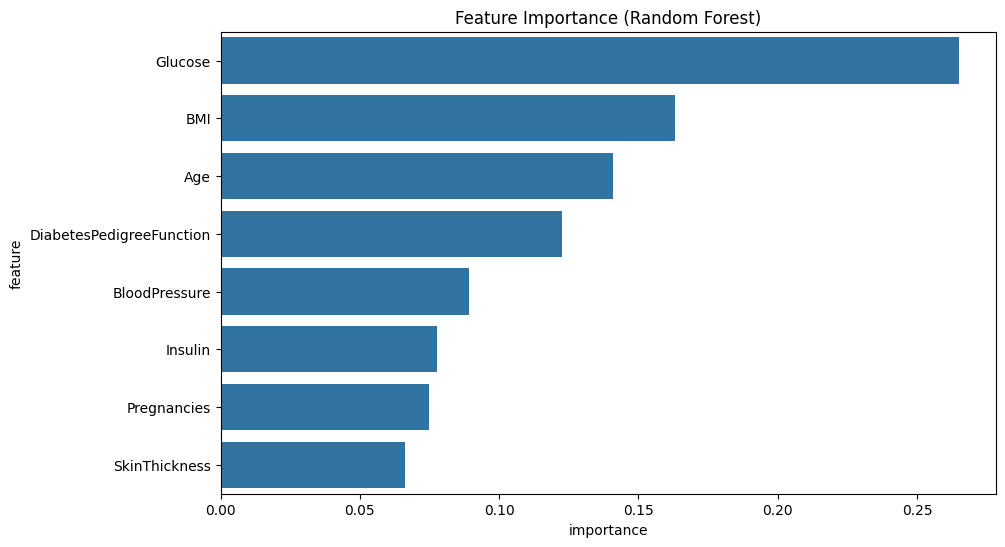

In [37]:
# Feature Importance for Decision Tree
for name in ['Decision Tree', 'Random Forest']:
    model = classifiers[name]
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance ({name})')
    plt.show()